In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
inputs = keras.Input(shape=(784,))

In [3]:
x = layers.Dense(512, activation="relu")(inputs)
outputs = layers.Dense(10,activation='softmax')(x)

In [4]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [5]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


750/750 [==============================] - 8s 4ms/step - loss: 0.2530 - accuracy: 0.9265 - val_loss: 0.1422 - val_accuracy: 0.9587
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1037 - accuracy: 0.9686 - val_loss: 0.1021 - val_accuracy: 0.9695
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0679 - accuracy: 0.9799 - val_loss: 0.0831 - val_accuracy: 0.9758
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0855 - val_accuracy: 0.9767
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.0811 - val_accuracy: 0.9787
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0260 - accuracy: 0.9926 - val_loss: 0.0800 - val_accuracy: 0.9772
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0796 - val_accuracy: 0.9784
Epoch 8/20
750/75

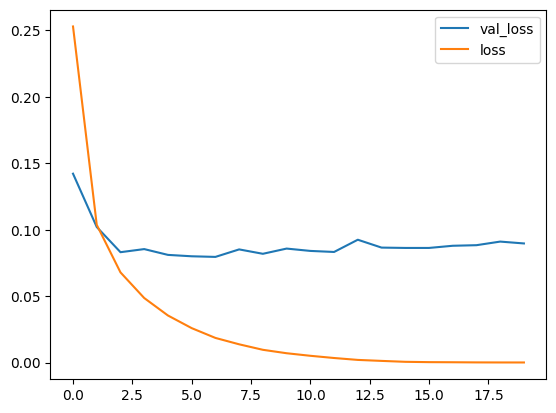

In [7]:
epochs = range(20)
plt.plot(epochs,history.history['val_loss'])
plt.plot(epochs,history.history['loss'])
plt.legend(['val_loss','loss'])

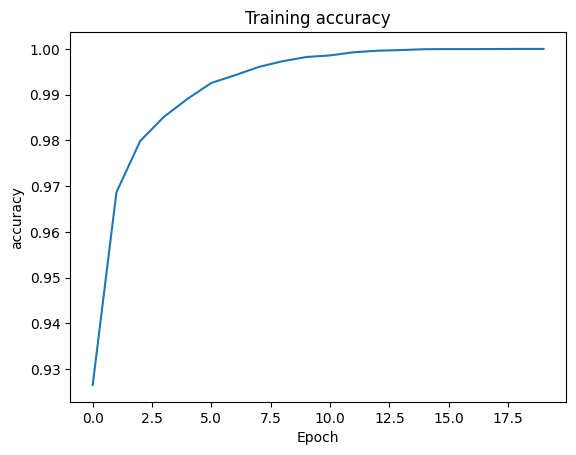

In [8]:
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()